# JPK AFM data analysis for liquid samples

## Import libraries
Run this ONLY ONCE. Always restart kernel before running.

In [1]:
%load_ext autoreload
%autoreload 2
%matplotlib nbagg

import sys
import os
from datetime import datetime
from PyQt5.QtWidgets import QApplication, QFileDialog, QListView, QTreeView, QAbstractItemView
#from IPython.display import Image
import matplotlib.pyplot as plt
import wetting, surfevol

app = QApplication(sys.argv)
plt.close('all')

#function to select multiple folders from dialog
def get_directories(caption=""):
    file_dialog = QFileDialog(caption=caption)
    file_dialog.setFileMode(QFileDialog.DirectoryOnly)
    file_dialog.setOption(QFileDialog.DontUseNativeDialog, True)
    file_view = file_dialog.findChild(QListView, 'listView')

    if file_view:
        file_view.setSelectionMode(QAbstractItemView.MultiSelection)
    f_tree_view = file_dialog.findChild(QTreeView)
    if f_tree_view:
        f_tree_view.setSelectionMode(QAbstractItemView.MultiSelection)

    if file_dialog.exec():
        paths = file_dialog.selectedFiles()
    else:
        paths = []

    return paths

## Surface Evolver simulation data files

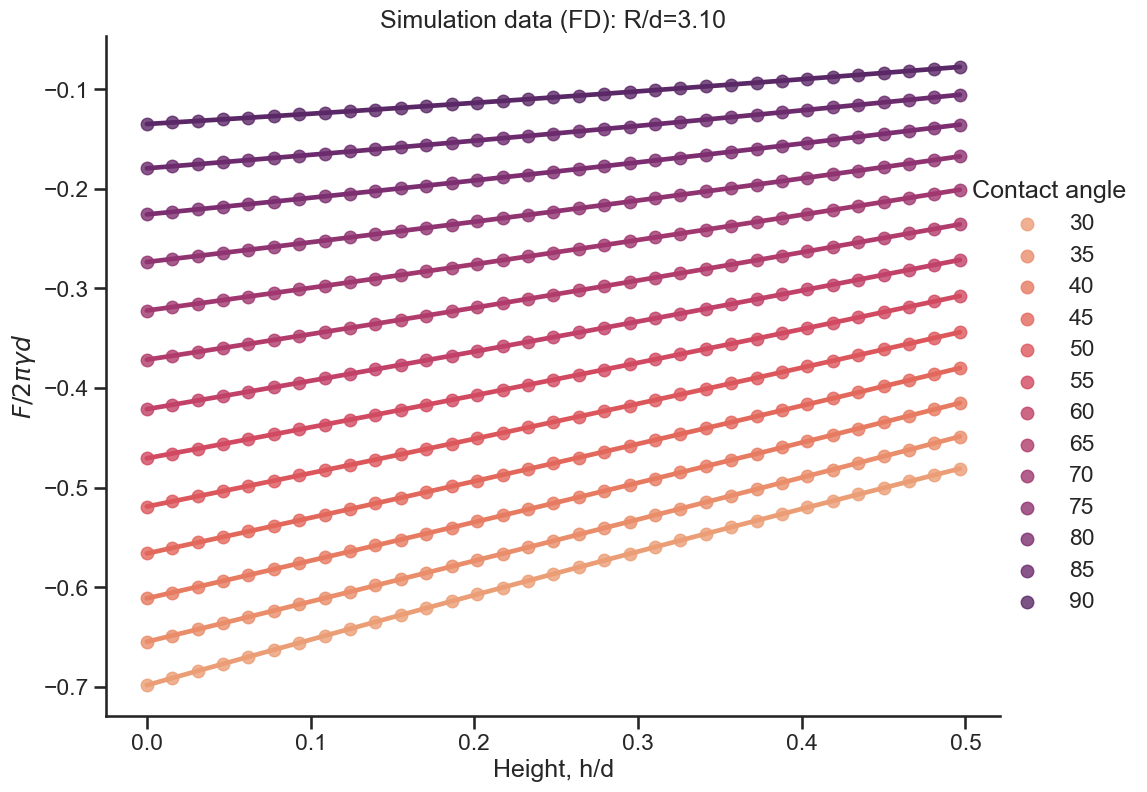

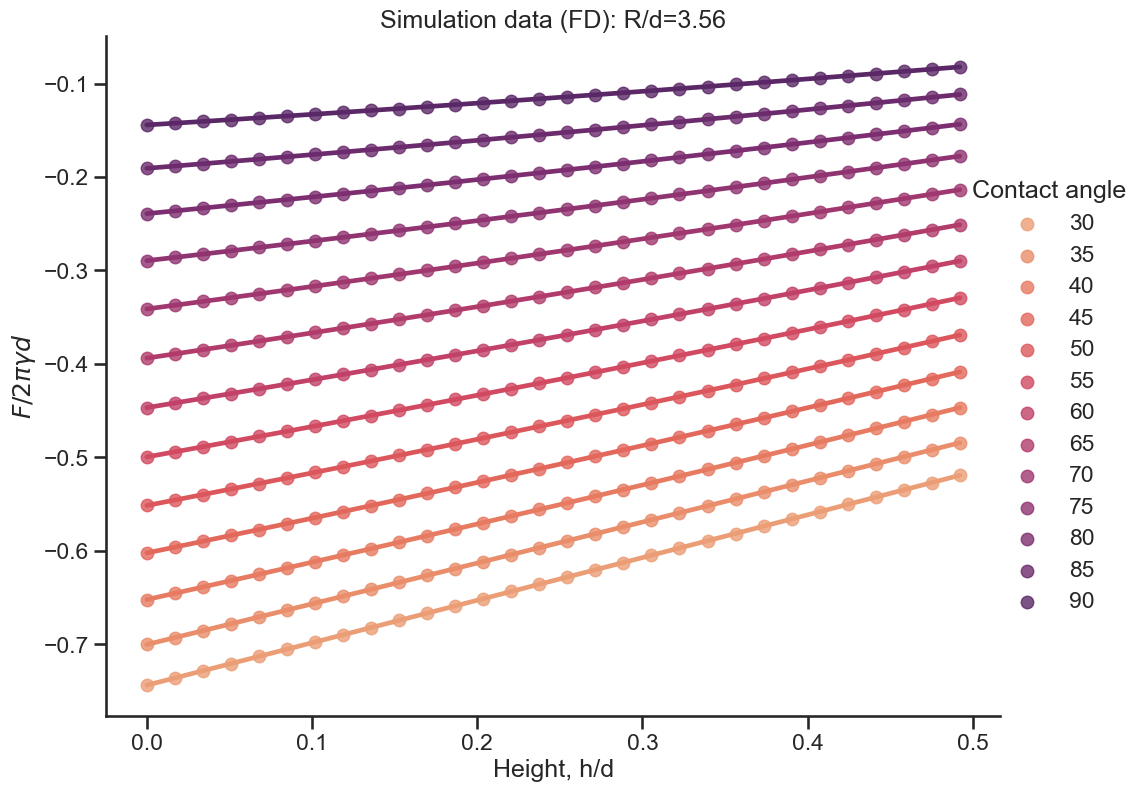

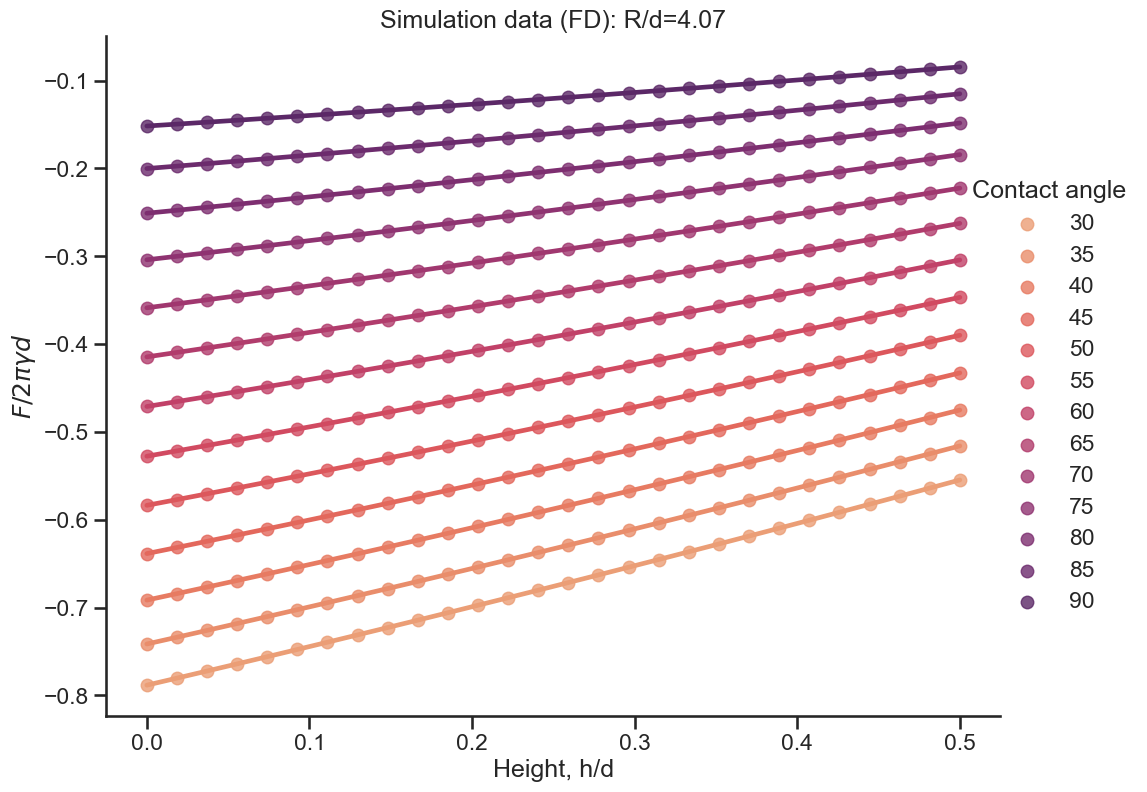

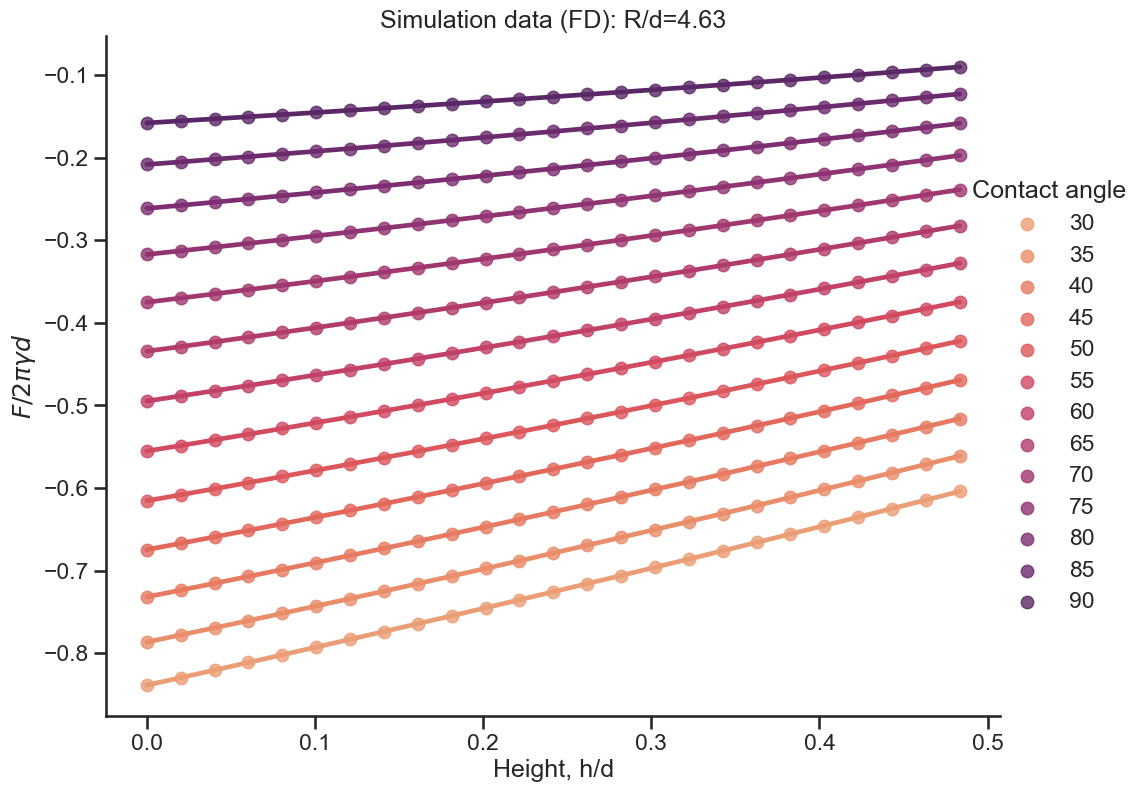

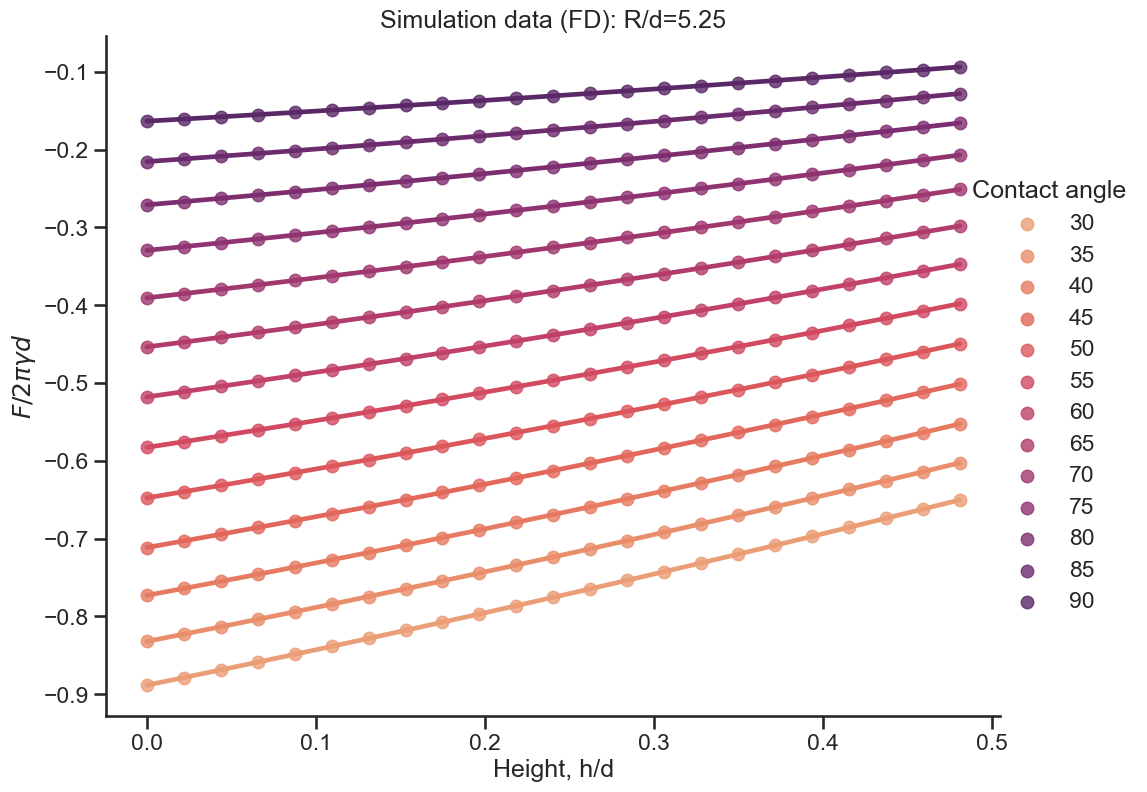

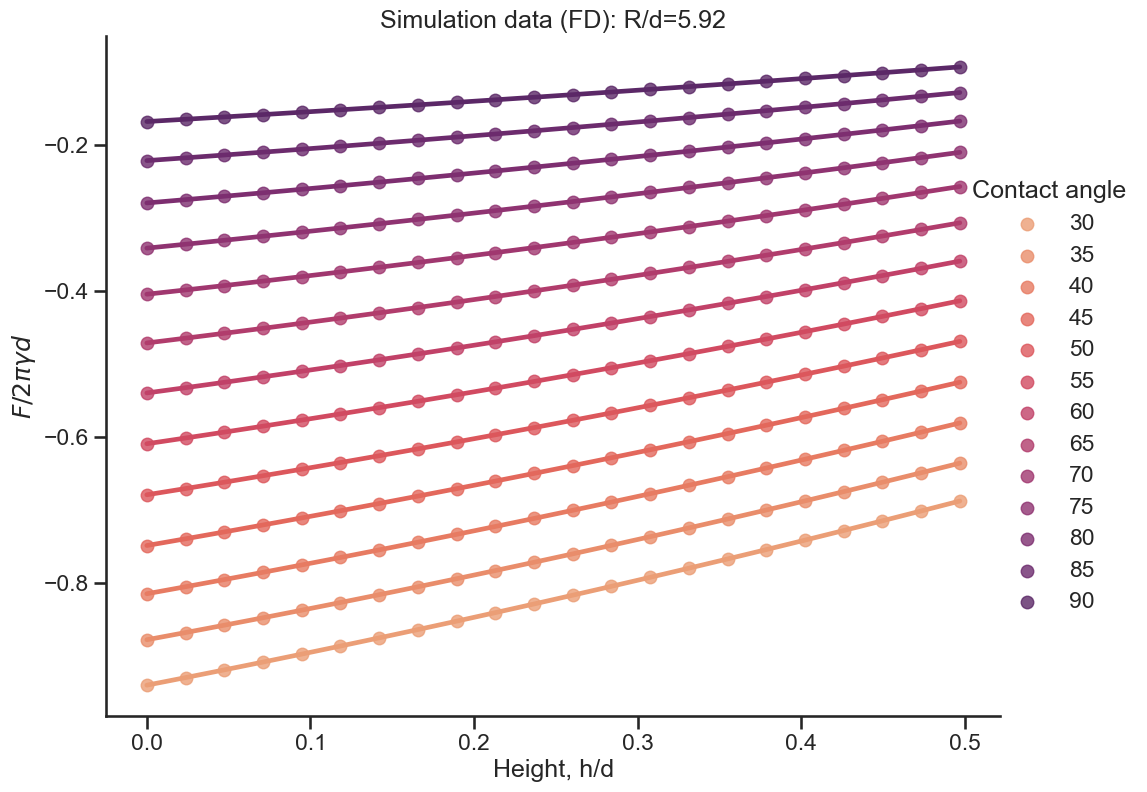

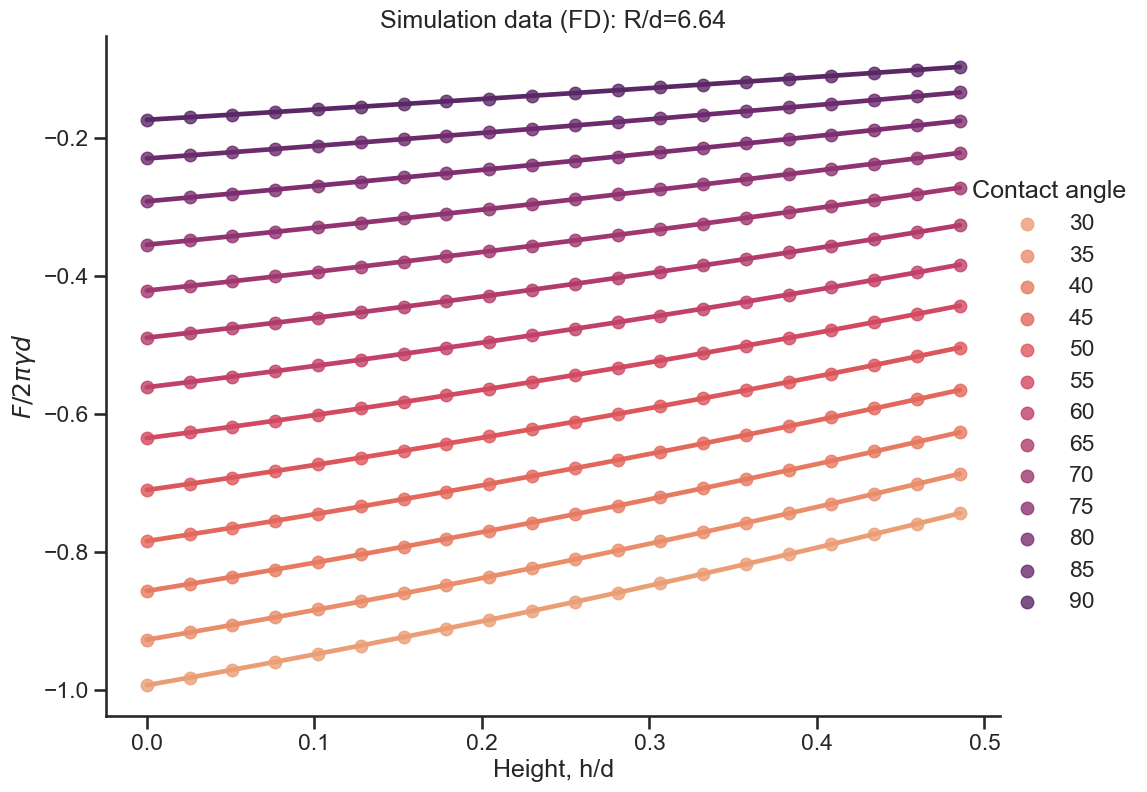

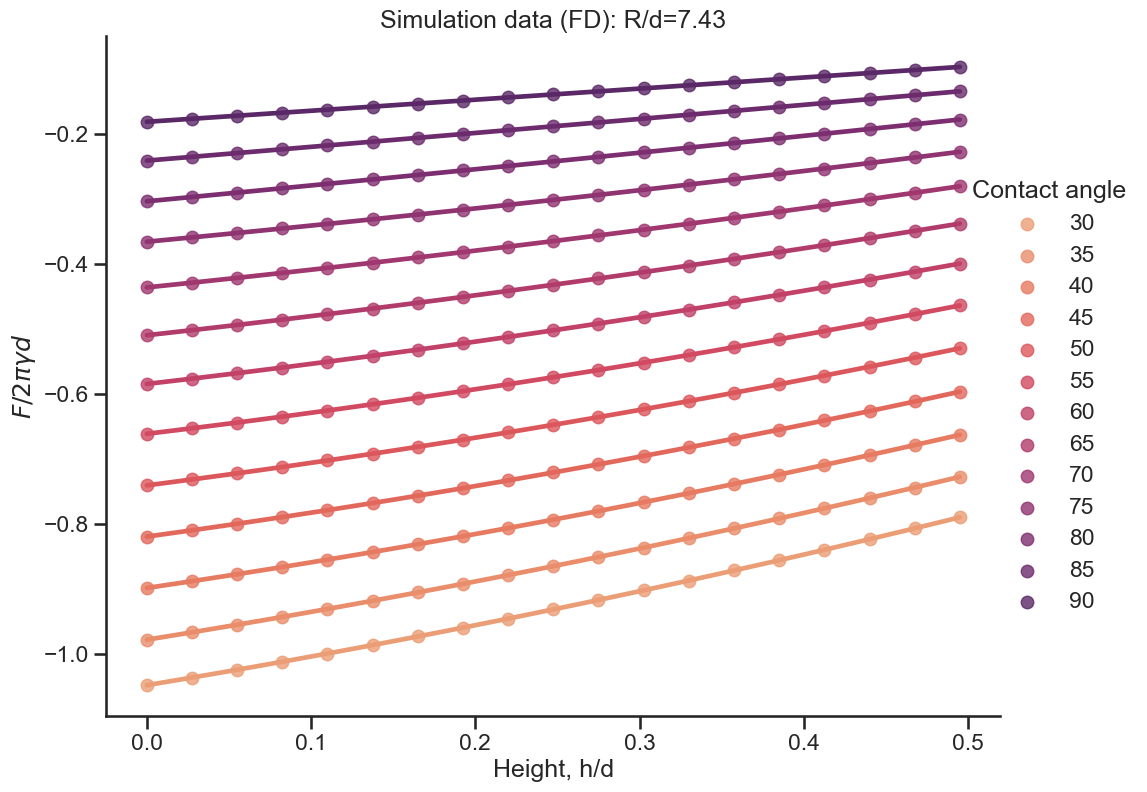

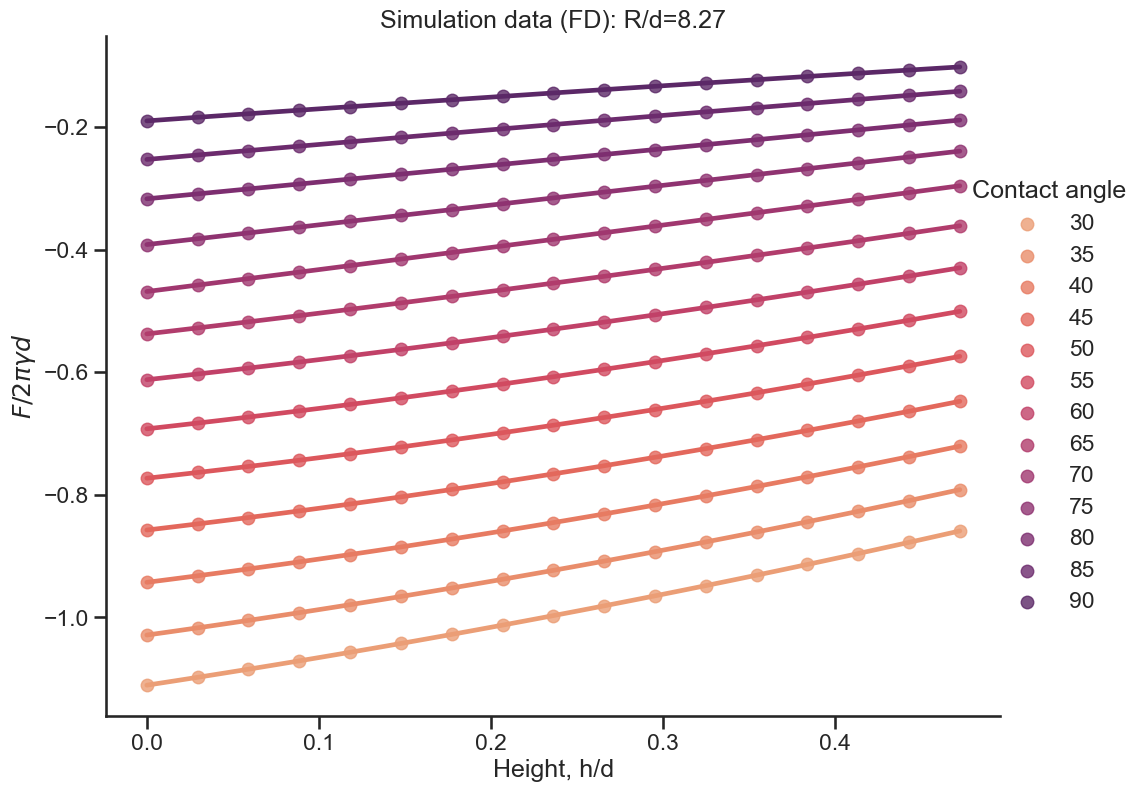

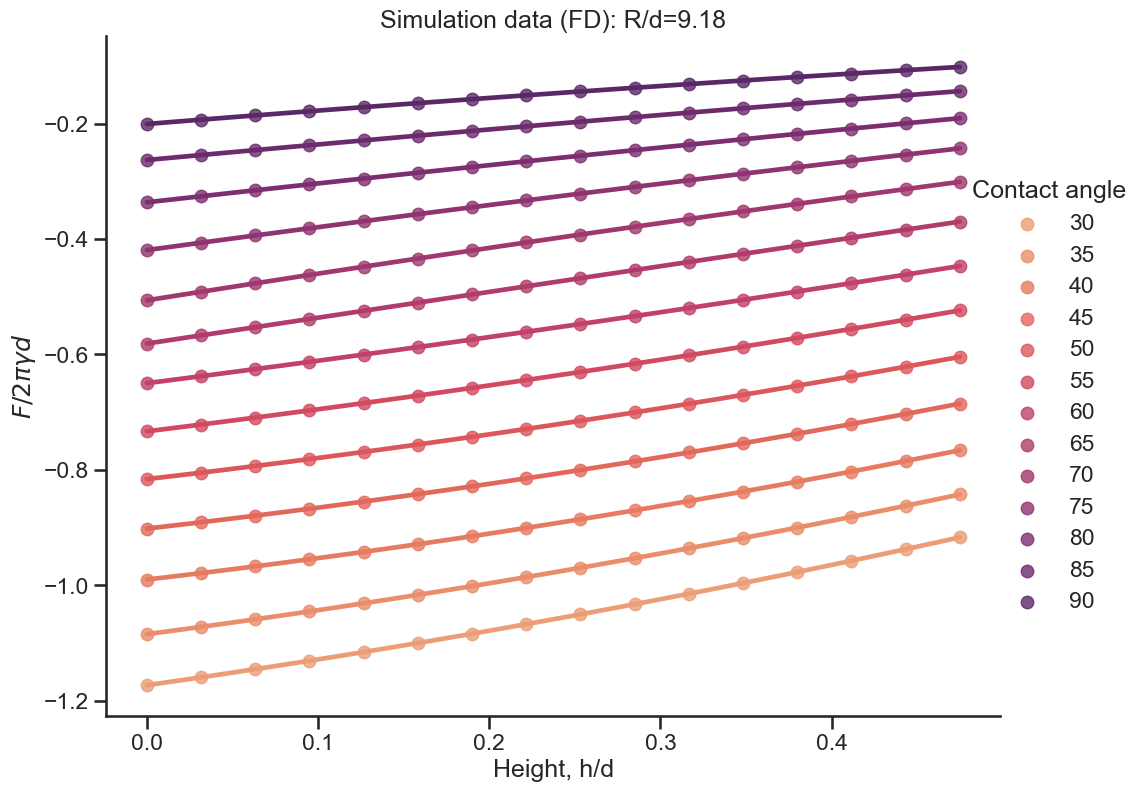

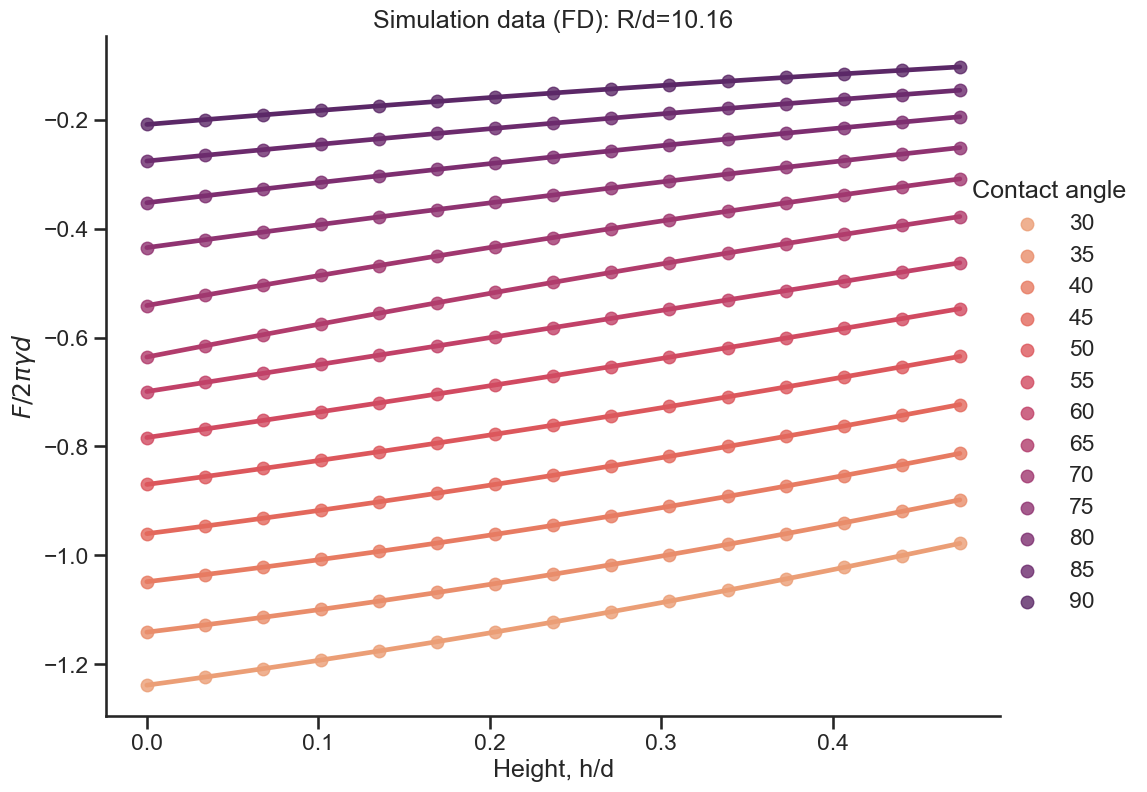

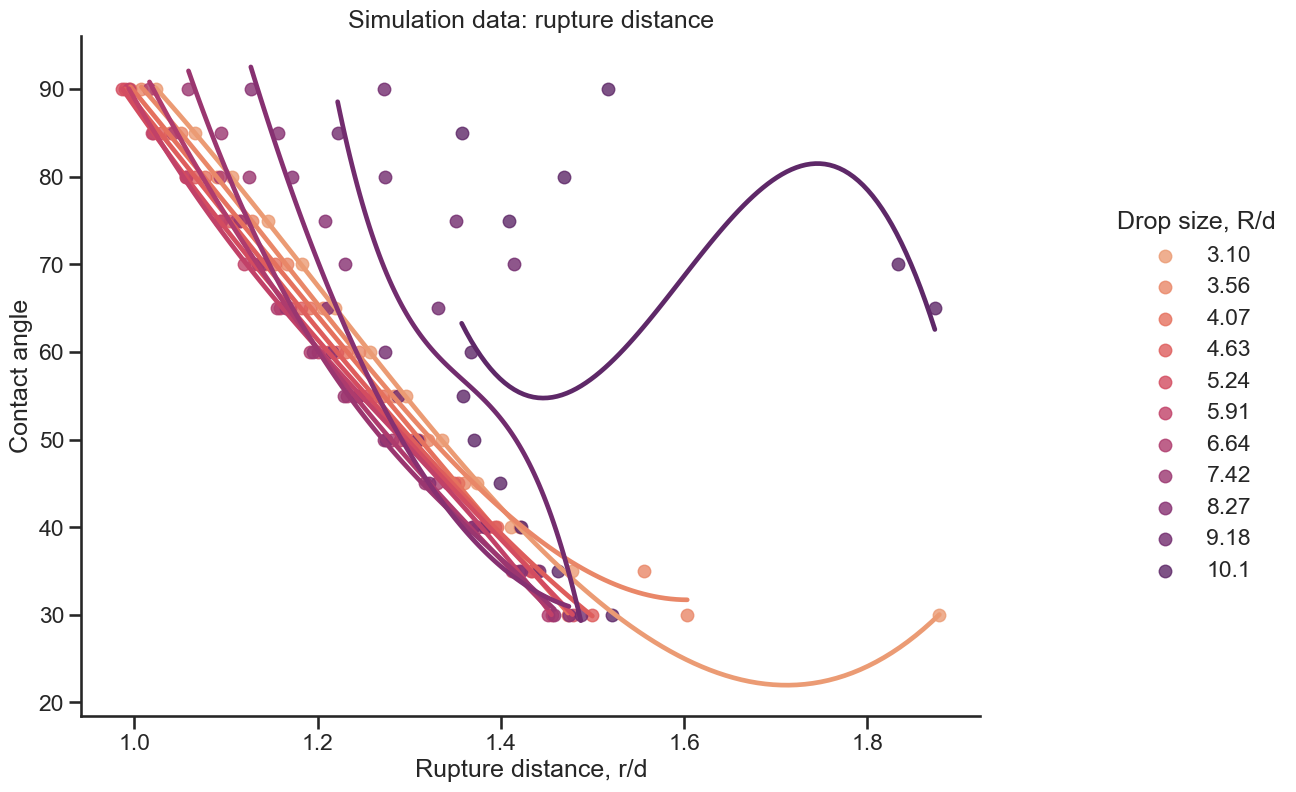

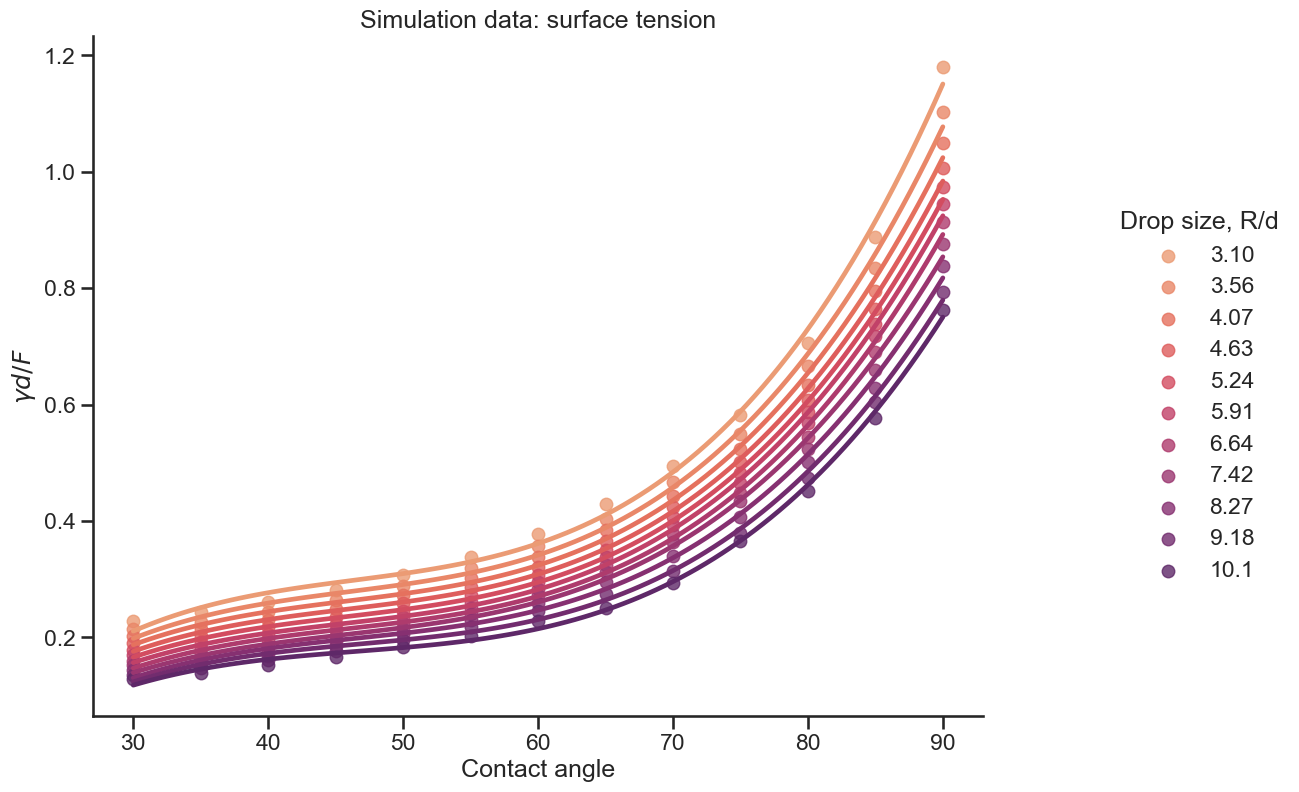

In [2]:
plt.close('all')

simu_folderpath = 'E:/Work/Surface Evolver/afm_pyramid/data/20220325_rfesp_np_fd/'

#combine simulation data for tip geometry
simu_df, simu_df_anal, fig_list = surfevol.combine_simul_dirs(simu_folderpath, 
                                                              fd_fit_order=2, plot=True)

#show plots below
for f in fig_list:
    display(f)
plt.close('all')

## JPK data raw files

In [3]:
jpk_file_paths, _ = QFileDialog.getOpenFileNames(caption='Select JPK data files') #JPK data (*.jpk,*.jpk-qi-data,*.jpk-force)
output_dir = QFileDialog.getExistingDirectory(caption='Select output data folder') #output folder
        
#separate image data and force data files
img_file_paths = []
fd_file_paths = []
for filepath in jpk_file_paths:
    file_ext = filepath.split('.')[-1]
    if file_ext in ['jpk', 'jpk-qi-data']:
        img_file_paths.append(filepath)
    elif file_ext in ['jpk-force']:
        fd_file_paths.append(filepath)
        
#make output directory
if output_dir == '':
        output_dir = os.path.dirname(jpk_file_paths[0]) + '/analysis' #default "analysis" folder
output_paths = []
for img_file_path in img_file_paths:
    file_name = os.path.basename(img_file_path)
    timestamp = datetime.today().strftime('%y%m%d-%H%M%S')
    output_path = f'{output_dir}/{file_name}_results_{timestamp}'
    os.makedirs(output_path, exist_ok=True)
    output_paths.append(output_path)

print('Image data:\n', img_file_paths, '\nForce data:\n', fd_file_paths, '\nOutput folder:\n', output_paths)

Image data:
 ['E:/Work/AFM/codes/data/save_area1-2022.03.31-19.06.55.842.jpk'] 
Force data:
 ['E:/Work/AFM/codes/data/force-save_area1_drops-2022.03.31-19.40.13.852.jpk-force', 'E:/Work/AFM/codes/data/force-save_area1_drops-2022.03.31-19.37.41.898.jpk-force', 'E:/Work/AFM/codes/data/force-save_area1_drops-2022.03.31-19.35.14.282.jpk-force', 'E:/Work/AFM/codes/data/force-save_area1_drops-2022.03.31-19.32.42.865.jpk-force'] 
Output folder:
 ['E:/Work/AFM/codes/data/analysis/save_area1-2022.03.31-19.06.55.842.jpk_results_220603-191205']


## AFM image

Image file: E:/Work/AFM/codes/data/save_area1-2022.03.31-19.06.55.842.jpk
Output folder: E:/Work/AFM/codes/data/analysis/save_area1-2022.03.31-19.06.55.842.jpk_results_220603-191205


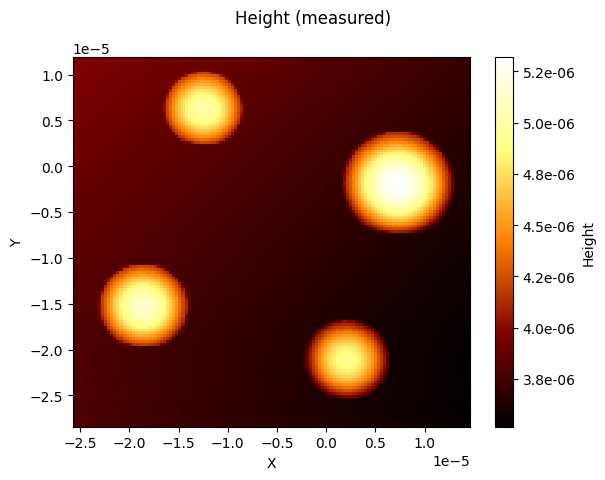

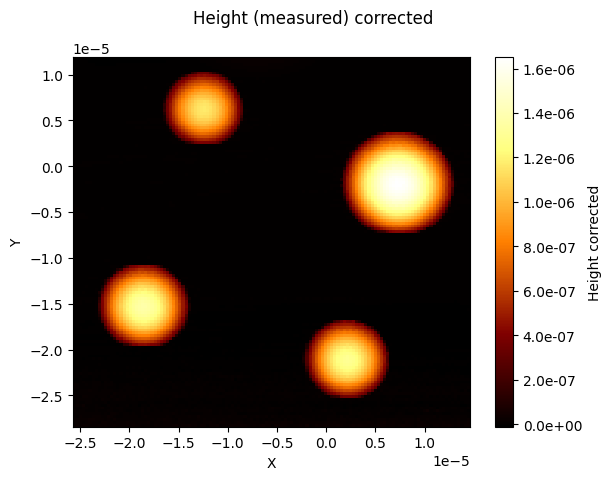

In [4]:
plt.close('all')
for img_file_path, output_path in zip(img_file_paths, output_paths):
    print('Image file:', img_file_path)
    print('Output folder:', output_path)
    afm_data, anal_data_h, fig_list =  wetting.get_afm_image(img_file_path, output_path, 
                                                             level_order=2, jump_tol=0.9)
    for fig in fig_list:
        display(fig)

plt.close('all')

## Get liquid drop properties

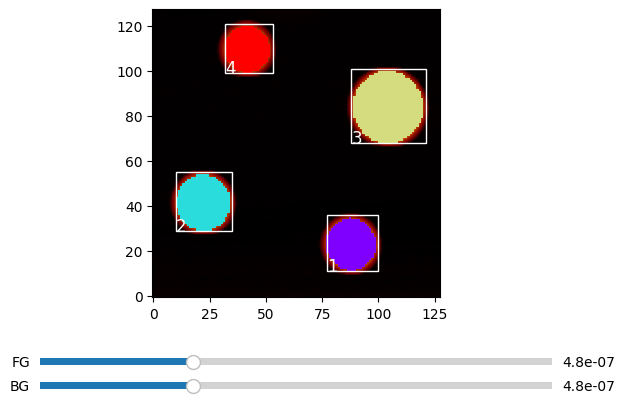

Label  Curvature  Contact Radius  Max Height  Max Height raw        Volume  \
0      1   0.000009        0.000005    0.000001        0.000001  4.459033e-17   
1      2   0.000010        0.000005    0.000001        0.000001  5.414415e-17   
2      3   0.000012        0.000006    0.000002        0.000002  9.746364e-17   
3      4   0.000009        0.000004    0.000001        0.000001  3.633548e-17   

     Volume raw  Drop contact angle         s       R/d  \
0  3.846539e-17           31.000174  0.000002  3.605862   
1  4.704569e-17           30.372284  0.000002  3.684133   
2  8.910464e-17           29.978486  0.000003  3.734855   
3  2.948741e-17           29.224799  0.000002  3.835656   

                                            AFM file  
0  E:/Work/AFM/codes/data/save_area1-2022.03.31-1...  
1  E:/Work/AFM/codes/data/save_area1-2022.03.31-1...  
2  E:/Work/AFM/codes/data/save_area1-2022.03.31-1...  
3  E:/Work/AFM/codes/data/save_area1-2022.03.31-1...

In [5]:
plt.close('all')
#drop analysis of AFM data
drop_df, img_anal, fig_list = wetting.get_drop_prop(afm_data, anal_data_h, output_paths[0])
drop_df['AFM file'] = img_file_paths[0]
for fig in fig_list:
    display(fig)
display(drop_df)
plt.close('all')

## Analyze force distance curves

Force file: E:/Work/AFM/codes/data/force-save_area1_drops-2022.03.31-19.40.13.852.jpk-force
jumpin distance 1.4787054128619056e-06
Fit distance 1.1925596530858047e-06
FD wetted length: 2.034931595654889e-06
energy 3 9.566351367763403e-14
Force file: E:/Work/AFM/codes/data/force-save_area1_drops-2022.03.31-19.37.41.898.jpk-force
jumpin distance 1.0223258874486657e-06
Fit distance 7.323561157761542e-07
FD wetted length: 1.4638752002241723e-06
energy 4 4.8463989614416576e-14
Force file: E:/Work/AFM/codes/data/force-save_area1_drops-2022.03.31-19.35.14.282.jpk-force
jumpin distance 1.1266408932477363e-06
Fit distance 7.740154605627156e-07
FD wetted length: 1.571407298020073e-06
energy 1 5.718260941853545e-14
Force file: E:/Work/AFM/codes/data/force-save_area1_drops-2022.03.31-19.32.42.865.jpk-force
jumpin distance 1.1912465847683052e-06
Fit distance 9.163374262792833e-07
FD wetted length: 1.6804001312158498e-06
energy 2 6.518424643354676e-14


RuntimeError: wrapped C/C++ object of type Plot2Widget has been deleted

<Figure size 978x538 with 1 Axes>

RuntimeError: wrapped C/C++ object of type Plot2Widget has been deleted

<Figure size 978x538 with 1 Axes>

RuntimeError: wrapped C/C++ object of type Plot2Widget has been deleted

<Figure size 978x538 with 1 Axes>

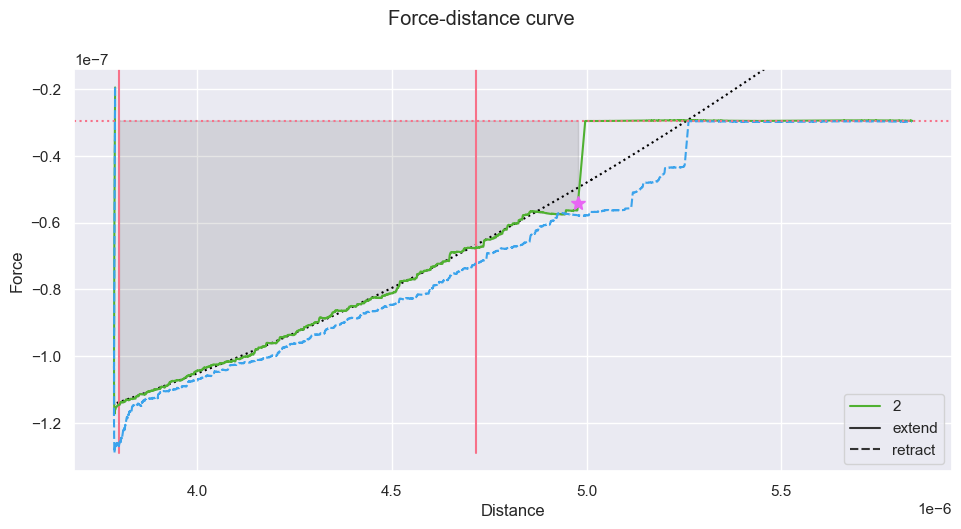

Label  Adhesion (FD)  Jumpin distance (FD)  Slope (FD)  Wetted length (FD)  \
0      3   1.065223e-07              0.000001    0.051786            0.000002   
1      4   7.610842e-08              0.000001    0.051327            0.000001   
2      1   8.263833e-08              0.000001    0.051701            0.000002   
3      2   8.787143e-08              0.000001    0.051517            0.000002   

   Fit distance (FD)  Adhesion energy (FD)  FD X position  FD Y position  \
0       1.192560e-06          9.566351e-14       0.000007      -0.000003   
1       7.323561e-07          4.846399e-14      -0.000012       0.000006   
2       7.740155e-07          5.718261e-14       0.000002      -0.000021   
3       9.163374e-07          6.518425e-14      -0.000019      -0.000015   

                                             FD file  
0  E:/Work/AFM/codes/data/force-save_area1_drops-...  
1  E:/Work/AFM/codes/data/force-save_area1_drops-...  
2  E:/Work/AFM/codes/data/force-save_area1_drops-...  
3  E:/Work/AFM/codes/data/force-save_area1_drops-...

In [6]:
plt.close('all')
fd_drop_df, fdfit_dict, fddata_dict, fig_list = wetting.analyze_drop_fd(fd_file_paths, afm_data, img_anal,
                                                                        force_cycle = 'approach', fit_order = 2,
                                                                        output_path = output_paths[0])

for fig in fig_list:
    #fig = Image(fig_path, width=400, height=400)
    display(fig)
display(fd_drop_df)

## Droplet surface tension calculation

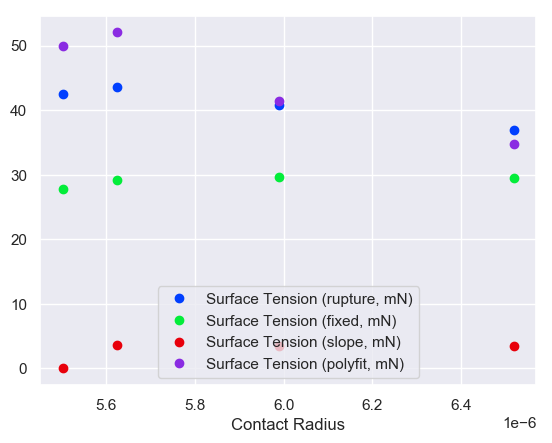

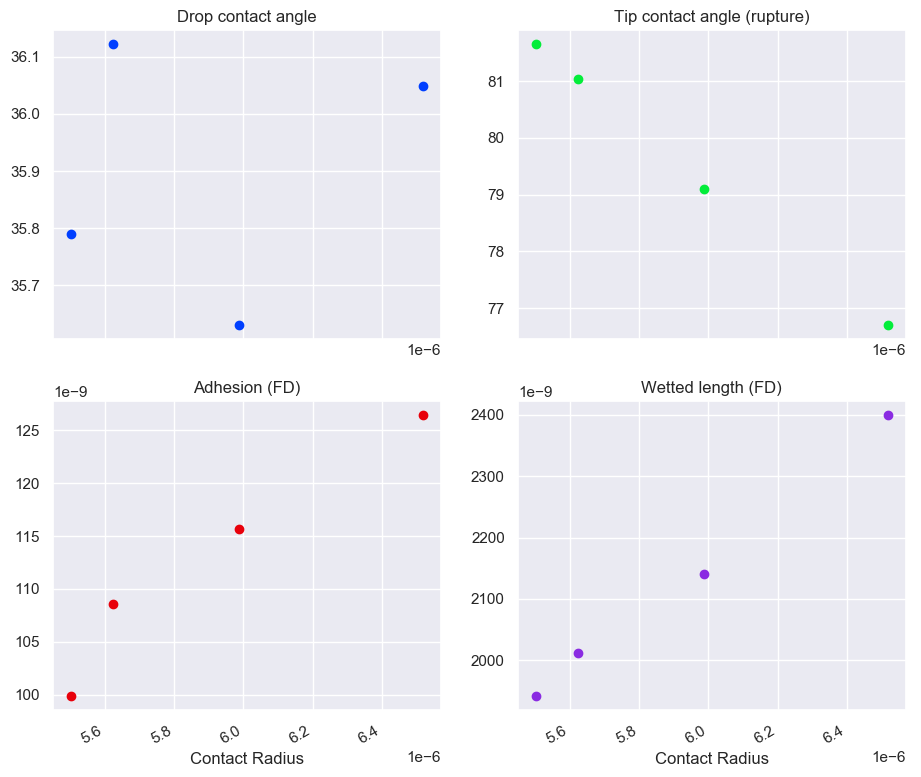

Curvature  Contact Radius  Max Height  Max Height raw        Volume  \
Label                                                                        
2       0.000009        0.000006    0.000002        0.000002  8.740370e-17   
1       0.000010        0.000006    0.000002        0.000002  1.121296e-16   
4       0.000010        0.000006    0.000002        0.000002  9.430428e-17   
3       0.000011        0.000007    0.000002        0.000002  1.465834e-16   

         Volume raw  Drop contact angle         s       R/d  \
Label                                                         
2      7.453427e-17           35.789652  0.000003  3.097016   
1      9.726842e-17           35.629709  0.000003  3.111863   
4      8.051078e-17           36.121463  0.000003  3.066620   
3      1.307240e-16           36.048802  0.000003  3.073230   

                                                AFM file  ...  FD Y position  \
Label                                                     ...                  
2      E:/Work/AFM/20220601 mineral oil_RFESPA_pdmsbr...  ...  -2.219063e-05   
1      E:/Work/AFM/20220601 mineral oil_RFESPA_pdmsbr...  ...  -2.925786e-05   
4      E:/Work/AFM/20220601 mineral oil_RFESPA_pdmsbr...  ...  -1.052292e-07   
3      E:/Work/AFM/20220601 mineral oil_RFESPA_pdmsbr...  ...  -7.396303e-06   

                                                 FD file  Simulation R/d  \
Label                                                                      
2      E:/Work/AFM/20220601 mineral oil_RFESPA_pdmsbr...        3.103803   
1      E:/Work/AFM/20220601 mineral oil_RFESPA_pdmsbr...        3.103803   
4      E:/Work/AFM/20220601 mineral oil_RFESPA_pdmsbr...        3.103803   
3      E:/Work/AFM/20220601 mineral oil_RFESPA_pdmsbr...        3.103803   

       Surface Tension (rupture, mN)  Tip contact angle (rupture)  \
Label                                                               
2                          42.517618                    81.646201   
1                          40.819632                    79.103848   
4                          43.630889                    81.045246   
3                          36.868235                    76.698176   

       F_fit_actual  Surface Tension (fixed, mN)  Tip contact angle (fixed)  \
Label                                                                         
2         -0.210368                    27.747305                       70.0   
1         -0.234309                    29.670832                       70.0   
4         -0.215995                    29.235418                       70.0   
3         -0.257265                    29.424216                       70.0   

      F_fit_fixed                                    Simulation file  
Label                                                                 
2       -0.322351  E:/Work/Surface Evolver/afm_pyramid/data/20220...  
1       -0.322351  E:/Work/Surface Evolver/afm_pyramid/data/20220...  
4       -0.322351  E:/Work/Surface Evolver/afm_pyramid/data/20220...  
3       -0.322351  E:/Work/Surface Evolver/afm_pyramid/data/20220...  

[4 rows x 27 columns]

Curvature  Contact Radius  Max Height  Max Height raw        Volume  \
Label                                                                        
2       0.000009        0.000006    0.000002        0.000002  8.740370e-17   
1       0.000010        0.000006    0.000002        0.000002  1.121296e-16   
4       0.000010        0.000006    0.000002        0.000002  9.430428e-17   
3       0.000011        0.000007    0.000002        0.000002  1.465834e-16   

         Volume raw  Drop contact angle         s       R/d  \
Label                                                         
2      7.453427e-17           35.789652  0.000003  3.097016   
1      9.726842e-17           35.629709  0.000003  3.111863   
4      8.051078e-17           36.121463  0.000003  3.066620   
3      1.307240e-16           36.048802  0.000003  3.073230   

                                                AFM file  ...  \
Label                                                     ...   
2      E:/Work/AFM/20220601 mineral oil_RFESPA_pdmsbr...  ...   
1      E:/Work/AFM/20220601 mineral oil_RFESPA_pdmsbr...  ...   
4      E:/Work/AFM/20220601 mineral oil_RFESPA_pdmsbr...  ...   
3      E:/Work/AFM/20220601 mineral oil_RFESPA_pdmsbr...  ...   

       Wetted length (FD)  Fit distance (FD)  Adhesion energy (FD)  \
Label                                                                
2                0.000002           0.000002          9.683149e-14   
1                0.000002           0.000002          1.211234e-13   
4                0.000002           0.000002          1.086275e-13   
3                0.000002           0.000002          1.520998e-13   

       FD X position  FD Y position  \
Label                                 
2      -2.677038e-05  -2.219063e-05   
1      -6.774745e-06  -2.925786e-05   
4      -2.141425e-05  -1.052292e-07   
3      -5.620896e-08  -7.396303e-06   

                                                 FD file      yd/F  \
Label                                                                
2      E:/Work/AFM/20220601 mineral oil_RFESPA_pdmsbr... -0.000174   
1      E:/Work/AFM/20220601 mineral oil_RFESPA_pdmsbr...  0.056691   
4      E:/Work/AFM/20220601 mineral oil_RFESPA_pdmsbr...  0.060848   
3      E:/Work/AFM/20220601 mineral oil_RFESPA_pdmsbr...  0.057593   

       Surface Tension FD (mN) Simulation contact angle  \
Label                                                     
2                    -0.009805            -13807.073444   
1                     3.406817             -1391.160328   
4                     3.602985             -1421.116003   
3                     3.432272             -1398.165648   

                                         Simulation file  
Label                                                     
2      E:/Work/Surface Evolver/afm_pyramid/data/20220...  
1      E:/Work/Surface Evolver/afm_pyramid/data/20220...  
4      E:/Work/Surface Evolver/afm_pyramid/data/20220...  
3      E:/Work/Surface Evolver/afm_pyramid/data/20220...  

[4 rows x 23 columns]

Curvature  Contact Radius  Max Height  Max Height raw        Volume  \
Label                                                                        
2       0.000009        0.000006    0.000002        0.000002  8.740370e-17   
1       0.000010        0.000006    0.000002        0.000002  1.121296e-16   
4       0.000010        0.000006    0.000002        0.000002  9.430428e-17   
3       0.000011        0.000007    0.000002        0.000002  1.465834e-16   

         Volume raw  Drop contact angle         s       R/d  \
Label                                                         
2      7.453427e-17           35.789652  0.000003  3.097016   
1      9.726842e-17           35.629709  0.000003  3.111863   
4      8.051078e-17           36.121463  0.000003  3.066620   
3      1.307240e-16           36.048802  0.000003  3.073230   

                                                AFM file  ...  \
Label                                                     ...   
2      E:/Work/AFM/20220601 mineral oil_RFESPA_pdmsbr...  ...   
1      E:/Work/AFM/20220601 mineral oil_RFESPA_pdmsbr...  ...   
4      E:/Work/AFM/20220601 mineral oil_RFESPA_pdmsbr...  ...   
3      E:/Work/AFM/20220601 mineral oil_RFESPA_pdmsbr...  ...   

       Fit distance (FD)  Adhesion energy (FD)  FD X position  FD Y position  \
Label                                                                          
2               0.000002          9.683149e-14  -2.677038e-05  -2.219063e-05   
1               0.000002          1.211234e-13  -6.774745e-06  -2.925786e-05   
4               0.000002          1.086275e-13  -2.141425e-05  -1.052292e-07   
3               0.000002          1.520998e-13  -5.620896e-08  -7.396303e-06   

                                                 FD file  Simulation R/d  \
Label                                                                      
2      E:/Work/AFM/20220601 mineral oil_RFESPA_pdmsbr...        3.103803   
1      E:/Work/AFM/20220601 mineral oil_RFESPA_pdmsbr...        3.103803   
4      E:/Work/AFM/20220601 mineral oil_RFESPA_pdmsbr...        3.103803   
3      E:/Work/AFM/20220601 mineral oil_RFESPA_pdmsbr...        3.103803   

       Surface Tension (error min, mN)  Tip contact angle (error min)  \
Label                                                                   
2                            49.949025                           85.0   
1                            41.375413                           80.0   
4                            52.038816                           85.0   
3                            34.742857                           75.0   

      RMSE (error min)  R square (error min)  
Label                                         
2         2.468863e-10              0.999594  
1         3.846338e-10              0.999179  
4         2.343444e-10              0.999684  
3         4.834834e-10              0.998905  

[4 rows x 24 columns]

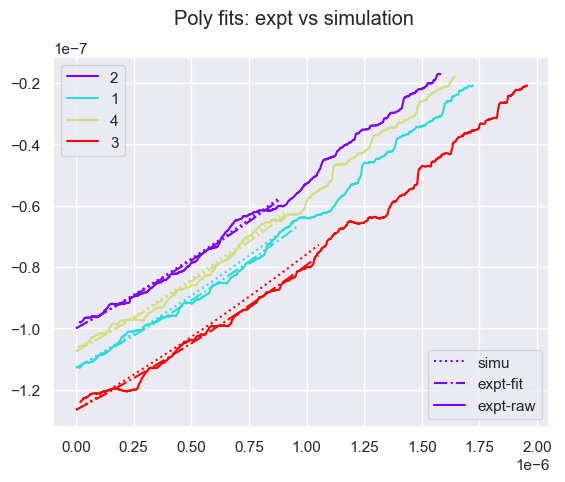

In [130]:
plt.close('all')
plt.style.use('seaborn-bright')
contact_angle = 70 #Set fixed value to calculate its corresponsing surface tension

#combine droplet image and force result data
afm_df = drop_df.set_index('Label').join(fd_drop_df.set_index('Label'), how='right')

#calculate surface tension (from rupture distance)
output_df = wetting.get_surface_tension3(afm_df, simu_df_anal,contact_angle,
                                          fd_file_paths, output_paths[0], True)

#output_df_filtered = output_df.dropna(subset=['FD file'])


# calculate surface tension from slopes of linear FD fitting
output_df2 = wetting.get_surface_tension2(afm_df, simu_df,
                                         tolerance=0.5,
                                         fd_file_paths=fd_file_paths,
                                         file_path=output_paths[0], save=True)
#output_df_filtered2 = output_df2[output_df['FD file'] != '']

# calculate surface tension by complete FD fitting using 2nd order poly approximation
output_df3, fig = wetting.get_surface_tension4(afm_df, simu_df, fdfit_dict,fddata_dict,
                                              file_path=output_paths[0], save=True)

ax = output_df.plot(x='Contact Radius', y=['Surface Tension (rupture, mN)','Surface Tension (fixed, mN)'],
                             marker = "o", ls="")
ax.plot(output_df2['Contact Radius'],output_df2['Surface Tension FD (mN)'],
        label="Surface Tension (slope, mN)", marker = "o", ls="")
ax.plot(output_df3['Contact Radius'],output_df3['Surface Tension (error min, mN)'],
        label="Surface Tension (polyfit, mN)", marker = "o", ls="")
ax.legend()

ax.ticklabel_format(axis='x', style='sci', scilimits=(-6,-6))
#show and save plot
fig1 = ax.get_figure()
display(fig1)
fig1.savefig(f'{output_paths[0]}/surface_tension.png', bbox_inches = 'tight',
             transparent = False)

plot_vars = ['Drop contact angle','Tip contact angle (rupture)',
             'Adhesion (FD)', 'Wetted length (FD)']
ax = output_df.plot(x='Contact Radius', y=plot_vars,title = plot_vars,
                             marker = "o", ls="", subplots=True, layout=(2,2), figsize=(11,10),
                             legend=False)
#number formatting
ax[1][0].ticklabel_format(axis='y', style='sci', scilimits=(-9,-9))
ax[1][1].ticklabel_format(axis='y', style='sci', scilimits=(-9,-9))
ax[1][1].ticklabel_format(axis='x', style='sci', scilimits=(-6,-6))
#show and save plot
fig2 = ax[0][0].get_figure()
display(fig2)
fig2.savefig(f'{output_paths[0]}/other_results.png', bbox_inches = 'tight',
             transparent = False)

display(output_df)
display(output_df2)
display(output_df3)
display(fig)
fig.savefig(f'{output_paths[0]}/polyfit_result.png', bbox_inches = 'tight',
            transparent = False)
plt.close('all')

## Combine results from different folders

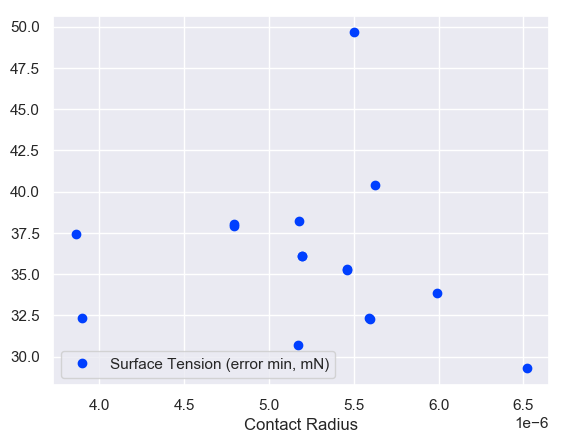

Curvature  Contact Radius  Max Height  Max Height raw        Volume  \
0   0.000010        0.000005    0.000002        0.000002  7.816619e-17   
1   0.000010        0.000006    0.000002        0.000002  8.488249e-17   
2   0.000009        0.000005    0.000002        0.000002  6.752796e-17   
3   0.000009        0.000005    0.000002        0.000002  6.707602e-17   
0   0.000010        0.000005    0.000002        0.000002  7.816619e-17   
1   0.000010        0.000006    0.000002        0.000002  8.488249e-17   
2   0.000009        0.000005    0.000002        0.000002  6.752796e-17   
3   0.000009        0.000005    0.000002        0.000002  6.707602e-17   
0   0.000010        0.000005    0.000002        0.000002  7.816619e-17   
1   0.000010        0.000006    0.000002        0.000002  8.488249e-17   
2   0.000009        0.000005    0.000002        0.000002  6.752796e-17   
3   0.000009        0.000005    0.000002        0.000002  6.707602e-17   
0   0.000010        0.000005    0.000002        0.000002  7.820079e-17   
1   0.000010        0.000006    0.000002        0.000002  8.507989e-17   
2   0.000009        0.000005    0.000002        0.000002  6.758540e-17   
3   0.000009        0.000005    0.000002        0.000002  6.739428e-17   
0   0.000010        0.000005    0.000002        0.000002  7.820079e-17   
1   0.000010        0.000006    0.000002        0.000002  8.507989e-17   
2   0.000009        0.000005    0.000002        0.000002  6.758540e-17   
3   0.000009        0.000005    0.000002        0.000002  6.739428e-17   
0   0.000010        0.000005    0.000002        0.000002  7.820079e-17   
1   0.000010        0.000006    0.000002        0.000002  8.507989e-17   
2   0.000009        0.000005    0.000002        0.000002  6.758540e-17   
3   0.000009        0.000005    0.000002        0.000002  6.739428e-17   
0   0.000009        0.000005    0.000001        0.000001  5.502676e-17   
1   0.000008        0.000005    0.000002        0.000002  5.606868e-17   
2   0.000007        0.000004    0.000001        0.000001  2.899555e-17   
3   0.000007        0.000004    0.000001        0.000001  2.864255e-17   
0   0.000009        0.000005    0.000001        0.000001  5.502676e-17   
1   0.000008        0.000005    0.000002        0.000002  5.606868e-17   
2   0.000007        0.000004    0.000001        0.000001  2.899555e-17   
3   0.000007        0.000004    0.000001        0.000001  2.864255e-17   
0   0.000009        0.000005    0.000001        0.000001  5.502676e-17   
1   0.000008        0.000005    0.000002        0.000002  5.606868e-17   
2   0.000007        0.000004    0.000001        0.000001  2.899555e-17   
3   0.000007        0.000004    0.000001        0.000001  2.864255e-17   
0   0.000009        0.000006    0.000002        0.000002  8.738760e-17   
1   0.000010        0.000006    0.000002        0.000002  1.120915e-16   
2   0.000010        0.000006    0.000002        0.000002  9.430984e-17   
3   0.000011        0.000007    0.000002        0.000002  1.465906e-16   
0   0.000009        0.000006    0.000002        0.000002  8.738760e-17   
1   0.000010        0.000006    0.000002        0.000002  1.120915e-16   
2   0.000010        0.000006    0.000002        0.000002  9.430984e-17   
3   0.000011        0.000007    0.000002        0.000002  1.465906e-16   
0   0.000009        0.000006    0.000002        0.000002  8.738760e-17   
1   0.000010        0.000006    0.000002        0.000002  1.120915e-16   
2   0.000010        0.000006    0.000002        0.000002  9.430984e-17   
3   0.000011        0.000007    0.000002        0.000002  1.465906e-16   

     Volume raw  Drop contact angle         s       R/d  \
0  6.776581e-17           33.113779  0.000003  3.363675   
1  7.483750e-17           33.421812  0.000003  3.330870   
2  5.800515e-17           33.210981  0.000003  3.353260   
3  5.782893e-17           33.367951  0.000003  3.336564   
0  6.776581e-17           33.113779  0.000003  3.363675   
1  7.483750e-17       

In [34]:
plt.close('all')
folder_paths = get_directories("Select analysis result folder (containing output Excel file)")
summary_df = wetting.combine_result_spreadsheets(folder_paths)
summary_df = summary_df[summary_df['FD file'] != '']

surf_ten_label = 'Surface Tension (error min, mN)' #'Surface Tension (fixed, mN)', 'Surface Tension (rupture, mN)', 'Surface Tension FD (mN)'
summary_df = summary_df[summary_df[surf_ten_label] != 0]
timestamp = datetime.today().strftime('%y%m%d-%H%M%S')
summary_df.to_excel(f'{output_dir}/summary_data_{surf_ten_label}_{timestamp}.xlsx', index=None)

ax = summary_df.plot(x='Contact Radius', 
                     y=[surf_ten_label],
                     marker = "o", ls="")

ax.ticklabel_format(axis='x', style='sci', scilimits=(-6,-6))
#show and save plot
fig3 = ax.get_figure()
fig2.savefig(f'{output_dir}/summary_plot_{surf_ten_label}_{timestamp}.png', bbox_inches = 'tight',
             transparent = False)
display(fig3)
display(summary_df)
plt.close('all')

## Combine multiple FD curves

In [62]:
# combine multiple fd curves
output_path = ''
fd_file_paths, _ = QFileDialog.getOpenFileNames()
wetting.combine_fd(fd_file_paths, zero_shift=True, 
                   output_dir=output_path,save=False)
#wetting.get_adhesion_from_fd(fd_file_paths)

## Optional codes

In [ ]:
# calculate contact angle from fd curve
label = 5 #INPUT
label_df = drop_df[drop_df['Label']==label]
s = label_df['s'].iloc[0]
R = round(label_df['R/s'].iloc[0])
contact_angle = wetting.get_contact_angle(fd_file_paths[0], simu_df,
                                         R, s, fit_index=5000)

